In [ ]:
# import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
employee_data = pd.read_csv("train.csv")

# print the first 5 rows
print(employee_data.head())

# finding best strategy

In [ ]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

In [111]:
z_tmp = np.arange(-10,11)
# z_tmp = np.arange(10,21)

print(z_tmp)

y = sigmoid(z_tmp)
print(y)
# print y with 2 decimal places
print(np.round(y,3))

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]
[0.    0.    0.    0.001 0.002 0.007 0.018 0.047 0.119 0.269 0.5   0.731
 0.881 0.953 0.982 0.993 0.998 0.999 1.    1.    1.   ]


In [131]:
z_tmp = np.arange(-10,11)
# z_tmp = np.arange(-1,2)
print(z_tmp)
# this gos from -0.5 to 0.5
z_tmp_X = (z_tmp - z_tmp.mean())/(z_tmp.max() - z_tmp.min())
print(z_tmp_X)

# this gos from -1 to 1
z_tmp_X = (z_tmp - z_tmp.mean())/(z_tmp.max() - z_tmp.min())*2
print(z_tmp_X)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Text(0.5, 0, 'z')

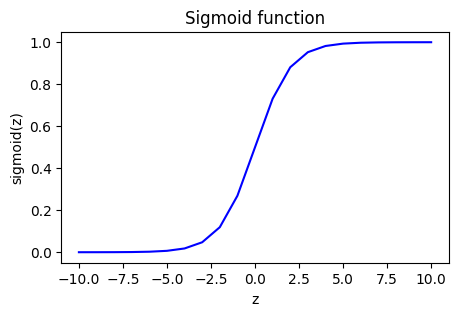

In [128]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, sigmoid(z_tmp), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')


In [132]:
# generate 10 number between -1 and 1
z_tmp = np.linspace(-10,10,10)
print(z_tmp)

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


Text(0.5, 0, 'z')

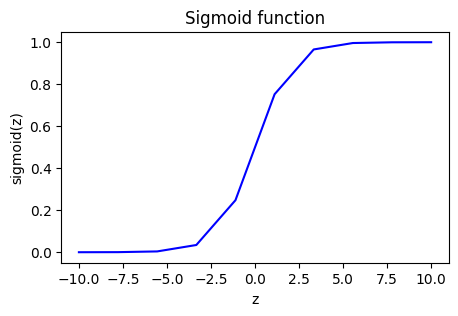

In [133]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, sigmoid(z_tmp), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')


Text(0.5, 0, 'z')

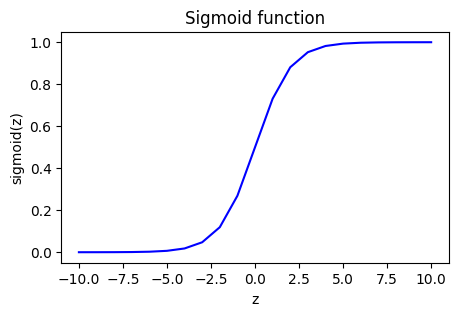

In [115]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

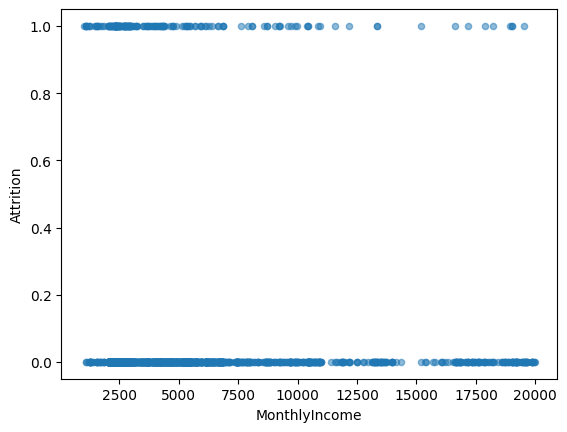

In [116]:
employee_data.plot.scatter(x="MonthlyIncome", y="Attrition", alpha=0.5)

# # show scatter plot of X vs y with alpha=0.5 andd between -1 and 1
# fig,ax = plt.subplots(1,1,figsize=(5,3))
# ax.scatter(X, y, alpha=0.5)
# ax.set_title("MonthlyIncome vs Attrition")
# ax.set_ylabel('Attrition')
# ax.set_xlabel('MonthlyIncome')

In [145]:
X = employee_data[["MonthlyIncome"]]
# create the target
y = employee_data[["Attrition"]]
print(X.shape)
print(y.shape)

print(X.head())
print(y.head())



(1677, 1)
(1677, 1)
   MonthlyIncome
0           2596
1           2899
2           4627
3           5347
4          19033
   Attrition
0          0
1          0
2          0
3          0
4          1


In [146]:

# normaalize X between -10 and 10
X = (X - X.mean())/(X.max() - X.min())*20
print(X.head())



   MonthlyIncome
0      -3.796920
1      -3.477350
2      -1.654854
3      -0.895480
4      13.538945


Text(0.5, 0, 'MonthlyIncome')

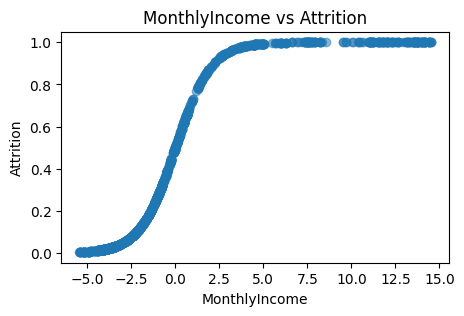

In [136]:
# show scatter plot of X vs y with alpha=0.5 andd between -1 and 1
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(X,sigmoid(X), alpha=0.5)
ax.set_title("MonthlyIncome vs Attrition")
ax.set_ylabel('Attrition')
ax.set_xlabel('MonthlyIncome')

# # show plot between -1 and 1
# ax.set_xlim(-1,1)



In [ ]:
# normalize the data between 0 and 1
# it is a good idea to normalize the data before or after model training

In [ ]:
# save as csv y
# y.to_csv('y.csv', index=False)
# X.to_csv('X.csv', index=False)

In [106]:
# use logistic regression to predict Attrition
from sklearn.linear_model import LogisticRegression

# create the model
model = LogisticRegression()

# fit the model

model.fit(X,y)

# predict the model
y_pred = model.predict(X)

# print the first 5 predictions
print(y_pred[:5])

[0 0 0 0 0]


/Users/luis/Documents/Projects/auto/playground-series-s3e6/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y = -0.00x + -1.34


Text(0.5, 0, 'MonthlyIncome')

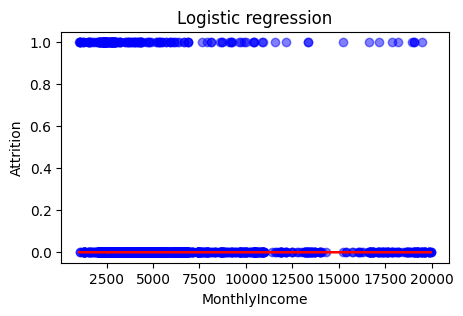

In [109]:
# show the model ecuation with 2 decimal places
print("y = {:.2f}x + {:.2f}".format(model.coef_[0][0], model.intercept_[0]))

# plot the data and the model
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(X, y, c="b", alpha=0.5)
ax.plot(X, y_pred, c="r")

ax.set_title("Logistic regression")
ax.set_ylabel('Attrition')
ax.set_xlabel('MonthlyIncome')


In [147]:
# linear regresion model
# example predict age by years of experience
# import the model
from sklearn.linear_model import LinearRegression


# create the model
model = LinearRegression()


# fit the model
model.fit(X, y)

# predict the target
y_pred = model.predict(X)

# print the first 5 predictions
print(y_pred[10:])

# # print the first 5 real values
# print(y[:5])

# % of atrition was 10%


[[0.15116141]
 [0.09712645]
 [0.14580069]
 ...
 [0.15013295]
 [0.12645113]
 [0.15205334]]


In [ ]:
# save y_pred as csv
pd.DataFrame(y_pred).to_csv('y_pred.csv', index=False)

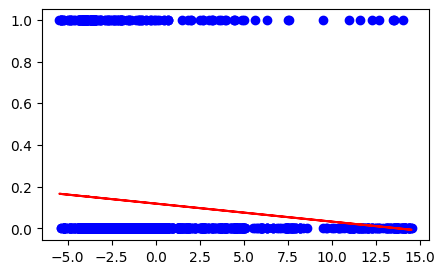

In [149]:
# plot predictions values 
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(X, y, c="b")
ax.plot(X, y_pred, c="r")

In [ ]:
# # plot y_pred
# fig,ax = plt.subplots(1,1,figsize=(5,3))
# ax.plot(X,sigmoid(y_pred), c="r")

y = -0.01x + 0.12


Text(0.5, 0, 'MonthlyIncome')

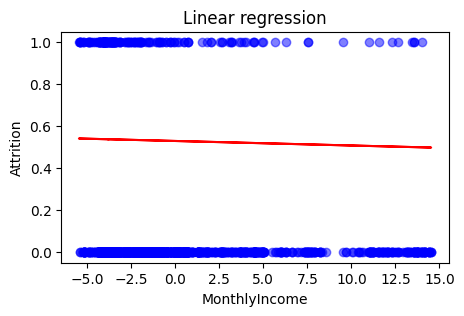

In [143]:
# show the model ecuation with 2 decimal places
print("y = {:.2f}x + {:.2f}".format(model.coef_[0][0], model.intercept_[0]))

# plot the data and the model
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(X, y, c="b", alpha=0.5)
ax.plot(X, sigmoid(y_pred), c="r")

ax.set_title("Linear regression")
ax.set_ylabel('Attrition')
ax.set_xlabel('MonthlyIncome')


In [ ]:
y_pred_1 = sigmoid(0.15)
print(y_pred_1)

In [ ]:
y_pred_logistic = sigmoid(y_pred)
print(y_pred_logistic[:5])
# save y_pred_logistic as csv

# fix AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'
y_pred_logistic_df = pd.DataFrame(y_pred_logistic)
y_pred_logistic_df.to_csv('y_pred_logistic.csv', index=False)


Text(0, 0.5, 'Attrition')

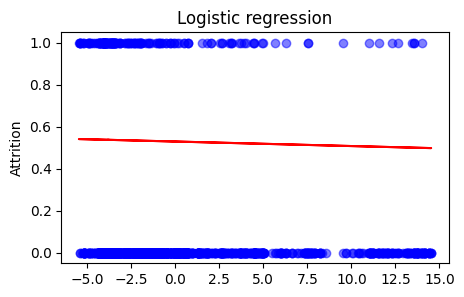

In [140]:
# plot the data and the model
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(X, y, c="b", alpha=0.5)
ax.plot(X, y_pred_logistic, c="r")

ax.set_title("Logistic regression")
ax.set_ylabel('Attrition')

In [ ]:
# implement linear regression from scratch using numpy
# import numpy
import numpy as np

# create the features
# X = employee_data[["YearsAtCompany"]]
X = employee_data["YearsAtCompany"]

# create the target
y = employee_data["Age"]

# show shape
print(X.shape)
print(y.shape)
print(X)
print(y)

In [ ]:
y = employee_data.Attrition

features = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
X = employee_data[features]


In [ ]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

In [ ]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
# Select columns corresponding to features, and preview the data
X = test_data[features]


In [ ]:
# The list of columns is stored in a variable called features
test_X = X

# make predictions which we will submit. 
test_preds = rf_model.predict(test_X)

print(test_preds)

In [ ]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_preds})
output.to_csv('submission.csv', index=False)